In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

https://www.kaggle.com/datasets/devansodariya/student-performance-data/data

In [2]:
df=pd.read_csv("student_data.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [5]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
string_col = df.select_dtypes(include=['object']).columns.tolist()
print(string_col)
print(len(string_col))

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
17


In [7]:
numerical_col = df.select_dtypes(include=['number']).columns.tolist()
print(numerical_col)
print(len(numerical_col))

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
16


In [8]:
plt.rcParams["font.family"] = "monospace"

String Data Distributions

In [9]:
print("=========================")
for col in string_col:
    print(df[col].value_counts())
    print("=========================")

school
GP    349
MS     46
Name: count, dtype: int64
sex
F    208
M    187
Name: count, dtype: int64
address
U    307
R     88
Name: count, dtype: int64
famsize
GT3    281
LE3    114
Name: count, dtype: int64
Pstatus
T    354
A     41
Name: count, dtype: int64
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64
reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64
guardian
mother    273
father     90
other      32
Name: count, dtype: int64
schoolsup
no     344
yes     51
Name: count, dtype: int64
famsup
yes    242
no     153
Name: count, dtype: int64
paid
no     214
yes    181
Name: count, dtype: int64
activities
yes    201
no     194
Name: count, dtype: int64
nursery
yes    314
no      81
Name: count, dtype: int64
higher
yes    375
no      20
Name: count, dtype: int64

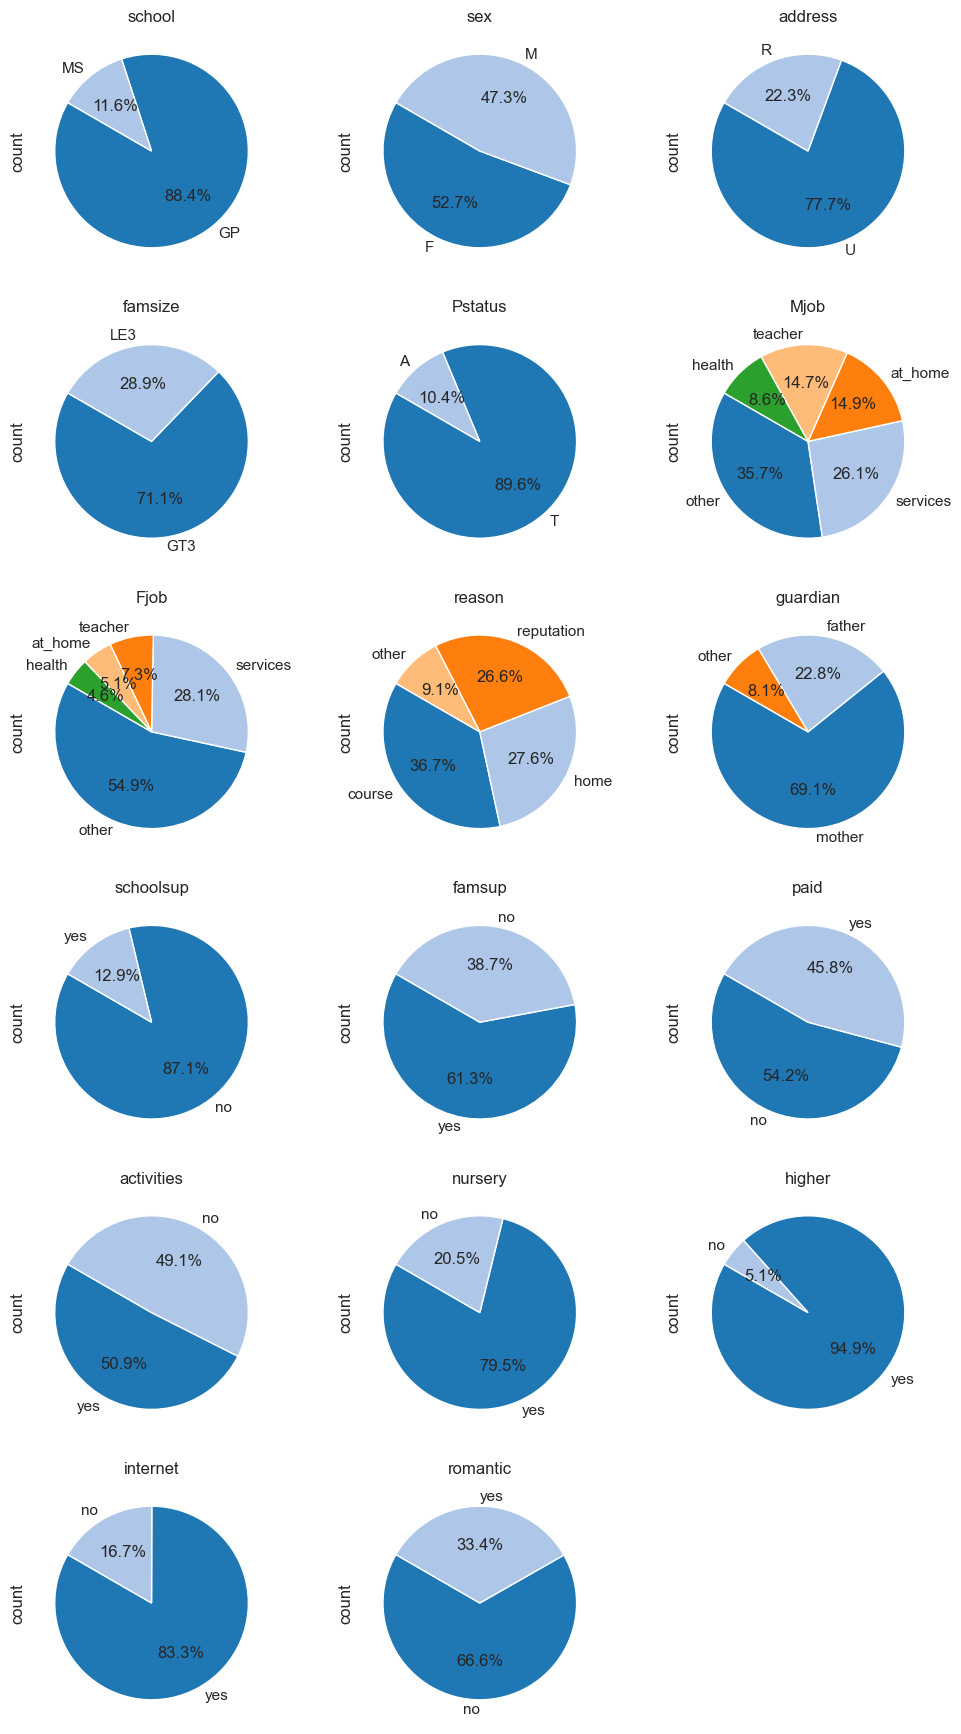

In [10]:
plt.figure(figsize=(12, 22))
sns.set_theme(style='darkgrid',palette='tab20')
for i, col in enumerate(string_col, start=1):
    plt.subplot(6, 3, i)
    df[col].value_counts().plot.pie(autopct='%1.1f%%',startangle=150)
    plt.title(f'{col}')
plt.show()

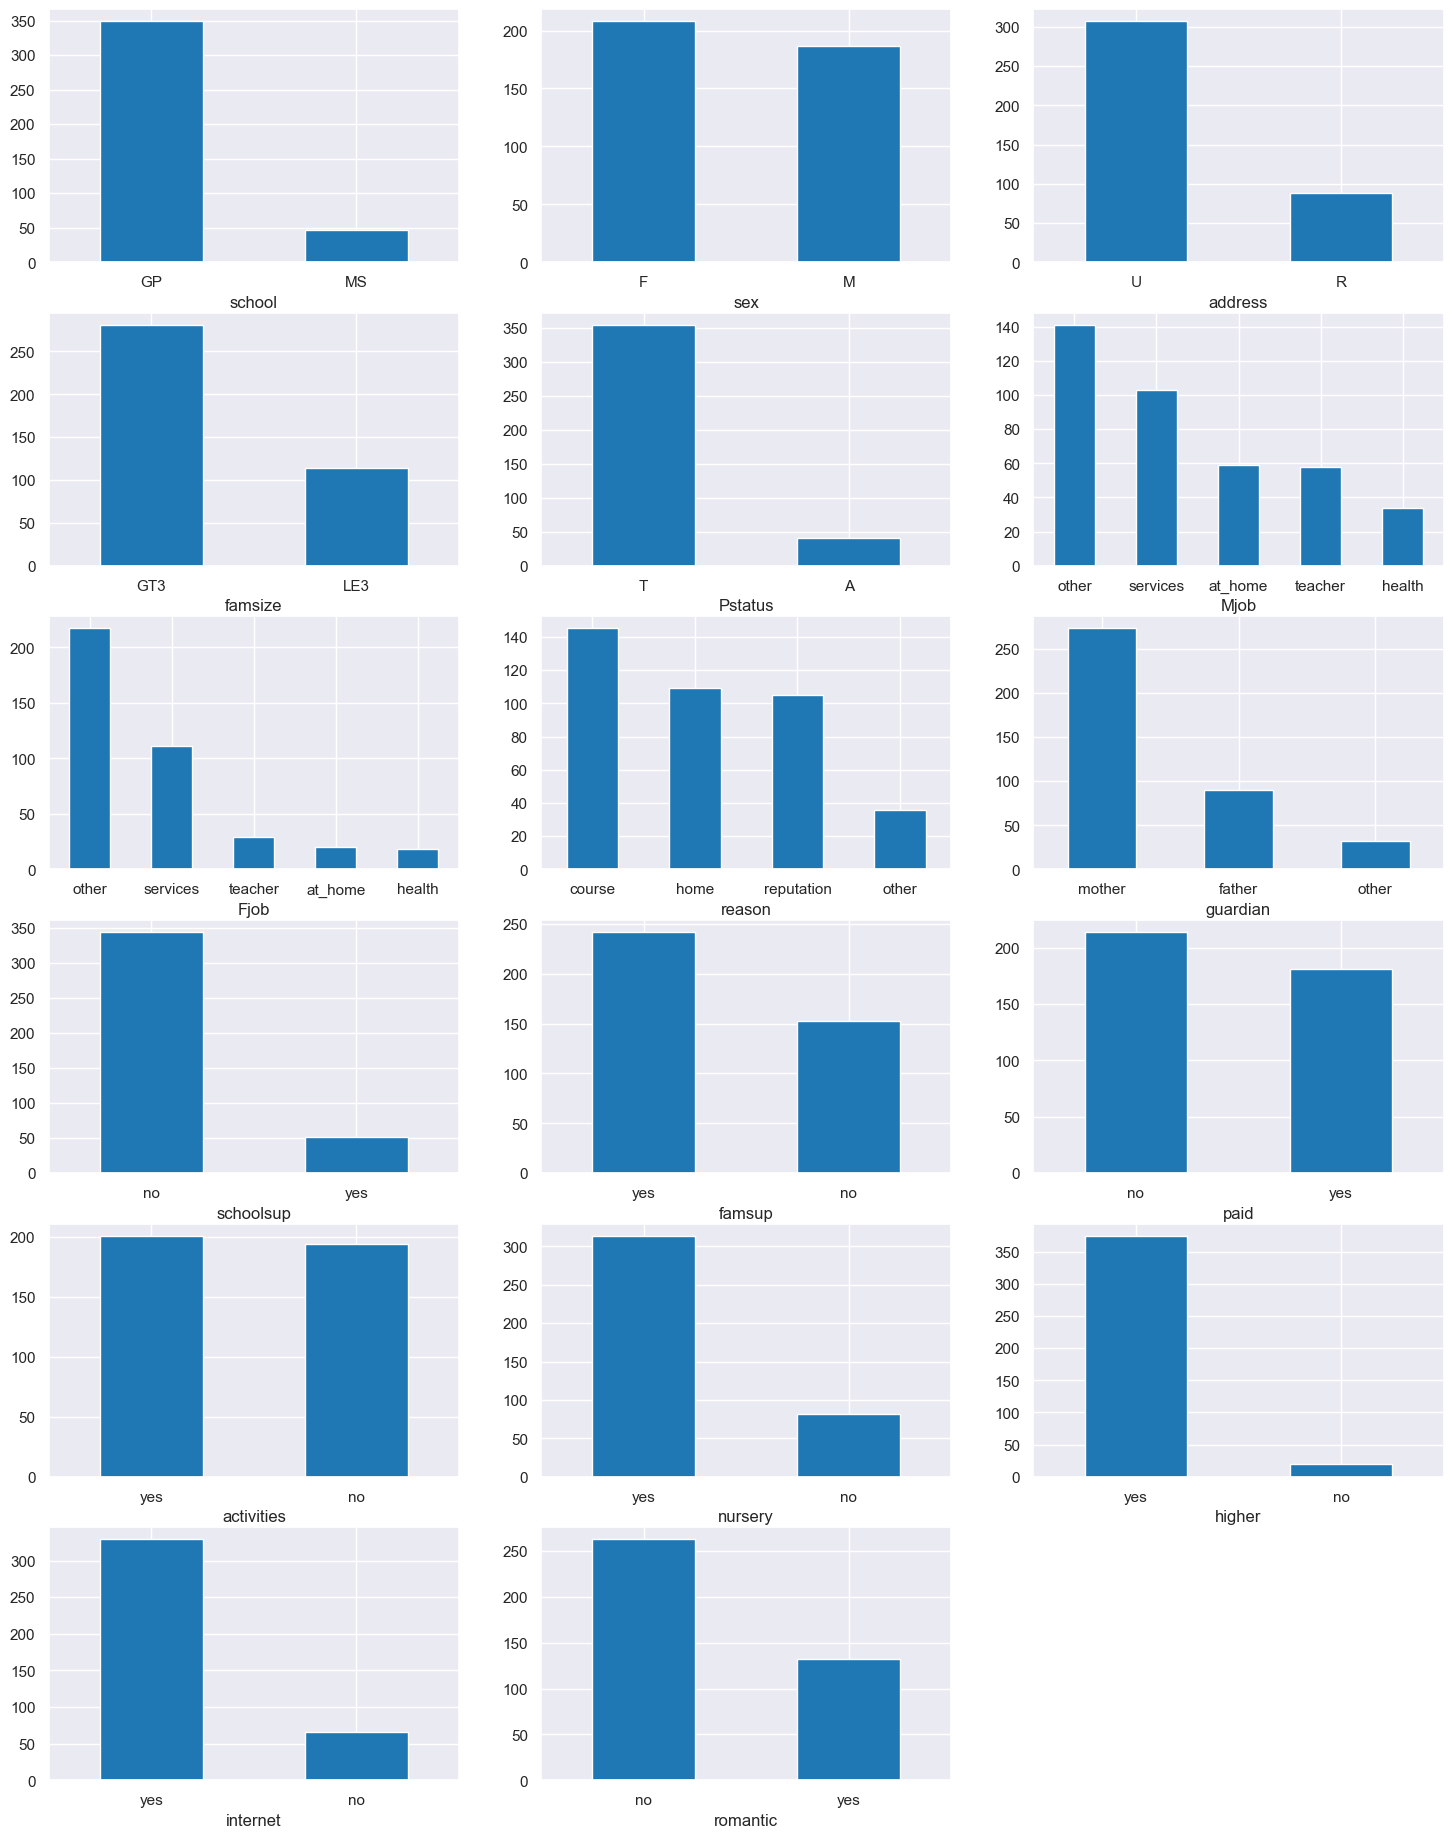

In [11]:
plt.figure(figsize=(18,23))
for i, col in enumerate(string_col, start=1):
    plt.subplot(6, 3, i)
    df[col].value_counts().plot(kind='bar',rot=0)
plt.show()

Numerical Data Visualisation

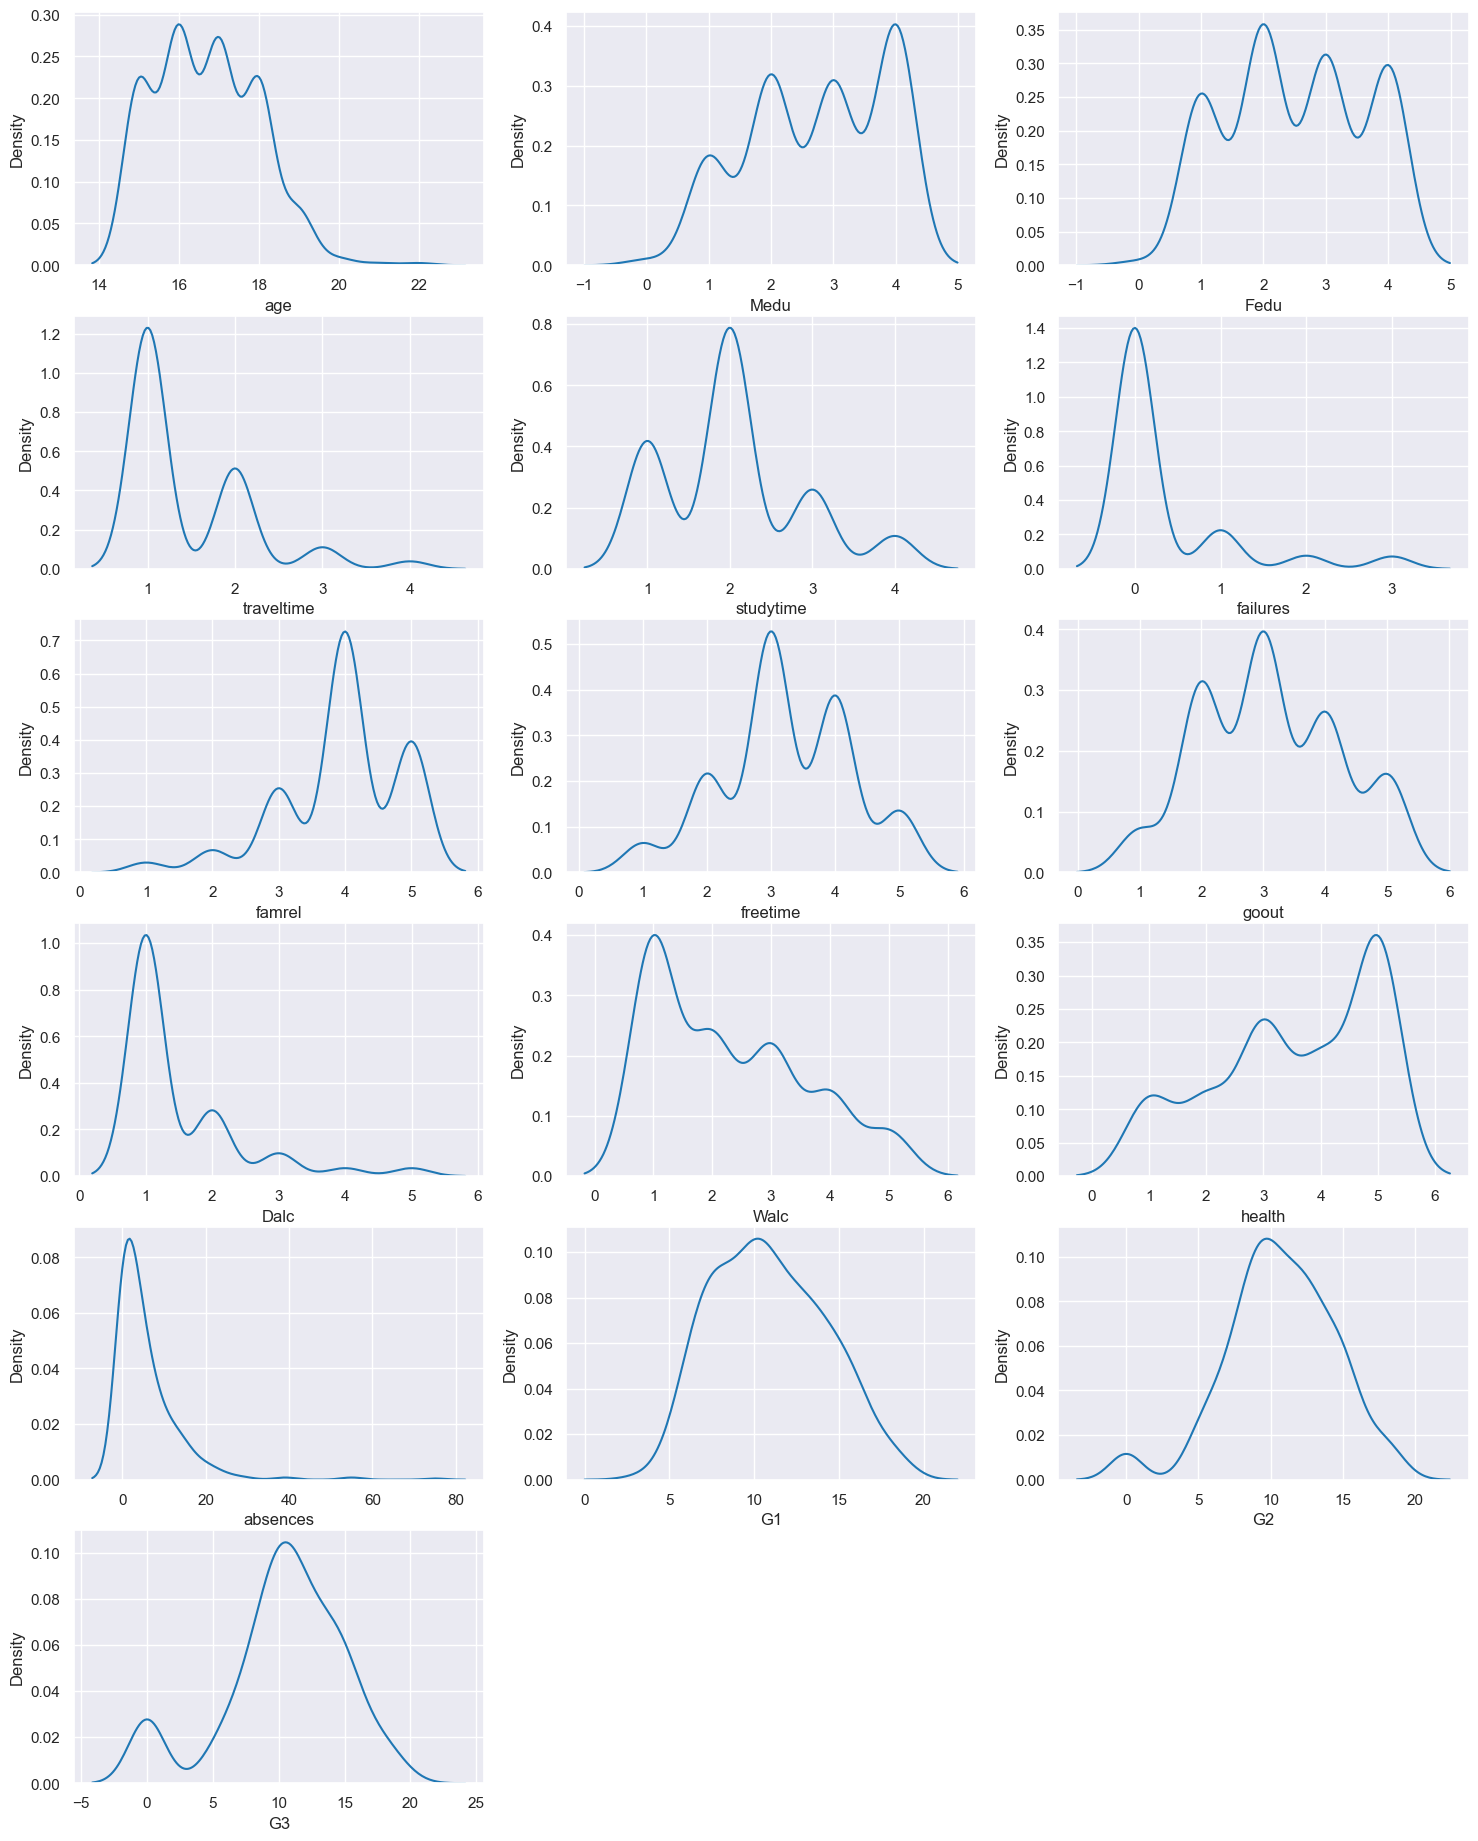

In [12]:
plt.figure(figsize=(18,23))
for i,col in enumerate(numerical_col, start=1):
    plt.subplot(6, 3, i)
    sns.kdeplot(data=df, x=col)
plt.show()

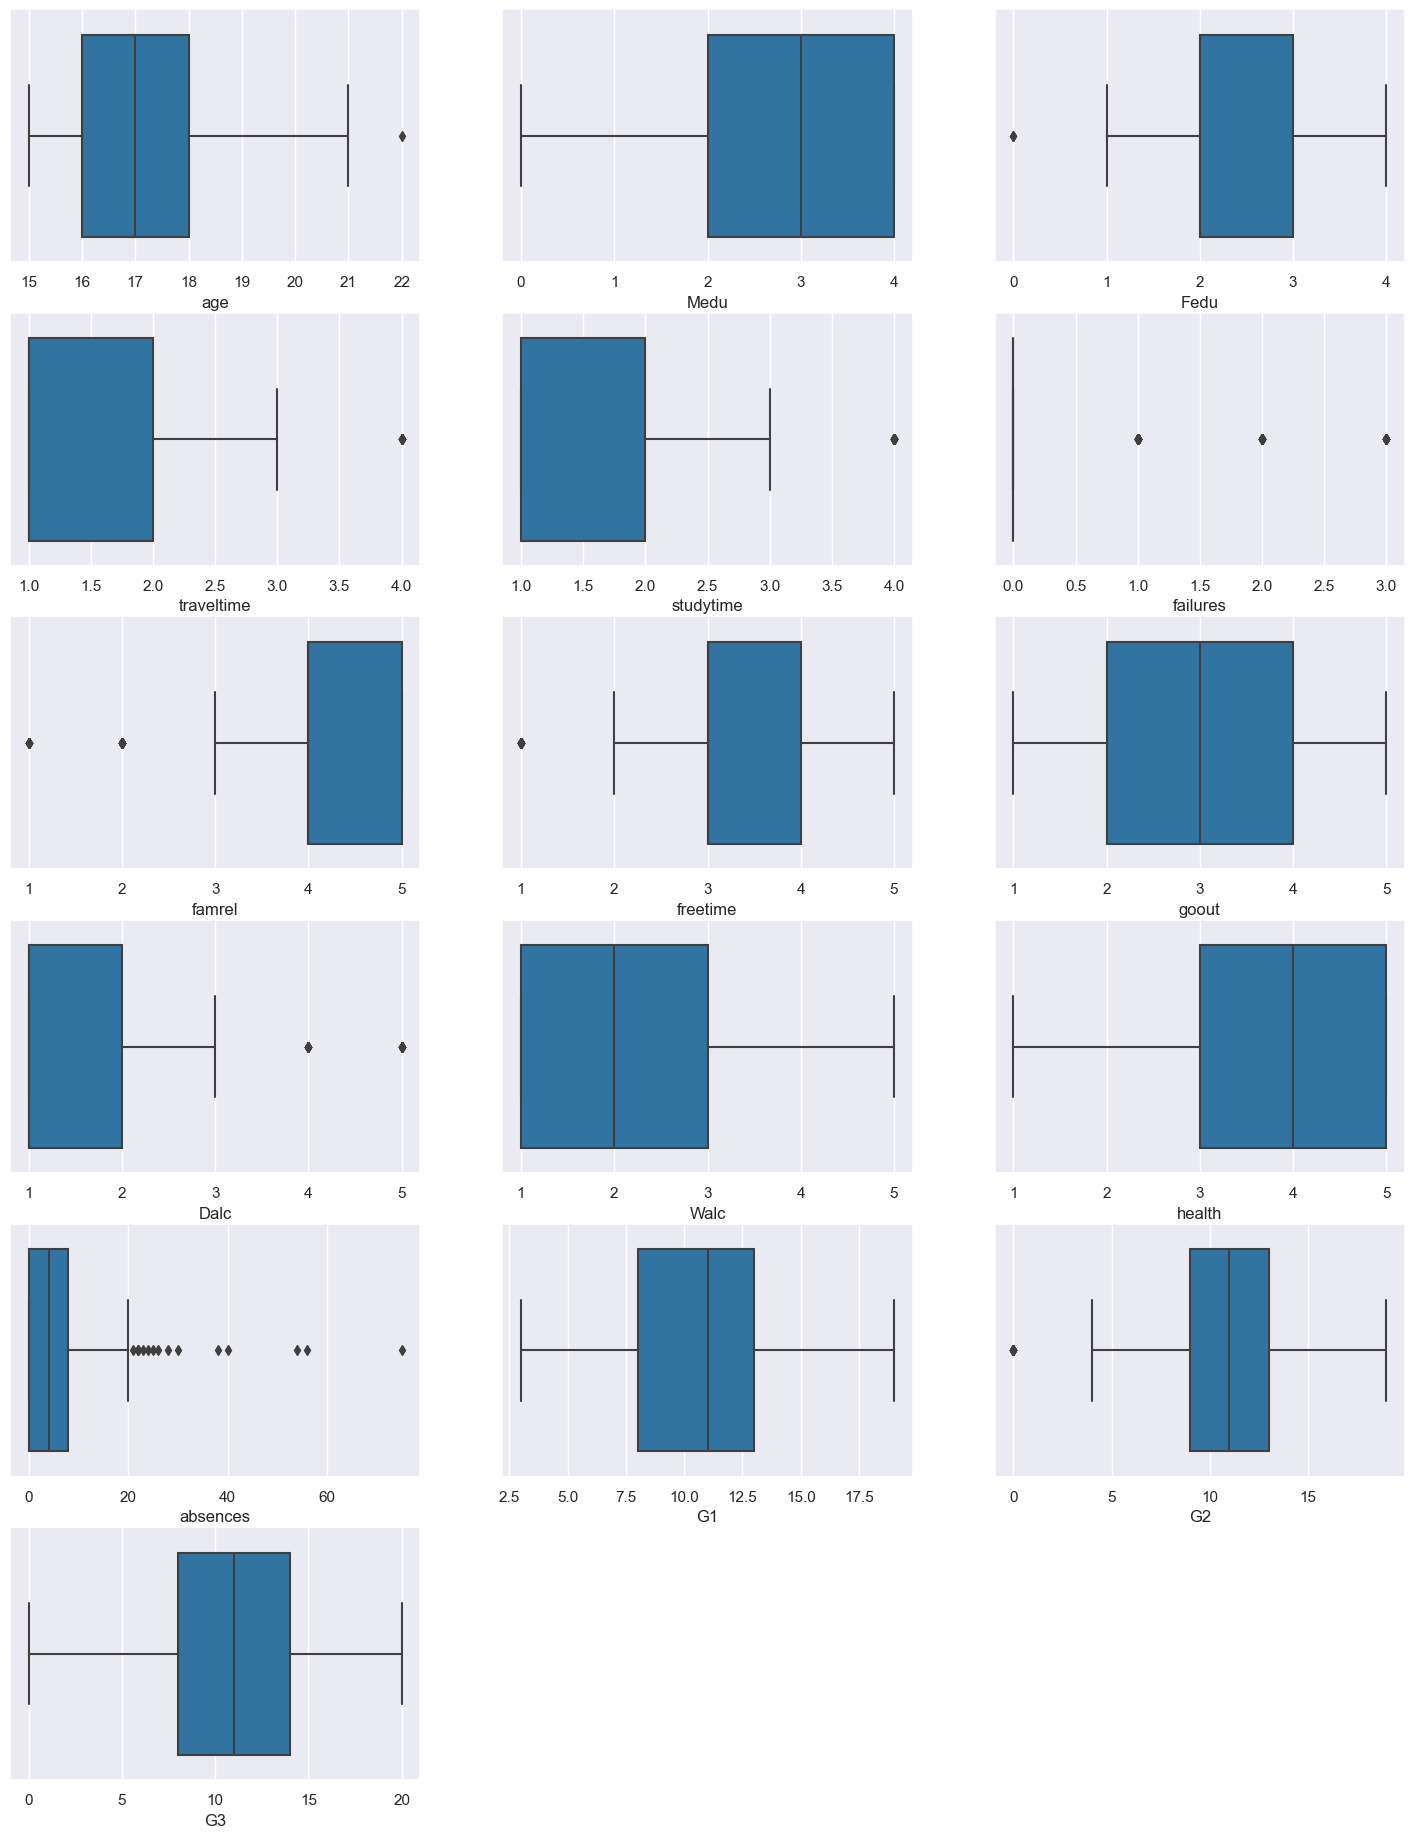

In [13]:
plt.figure(figsize=(18,23))
for i,col in enumerate(numerical_col, start=1):
    plt.subplot(6, 3, i)
    sns.boxplot(x=df[col])
plt.show()

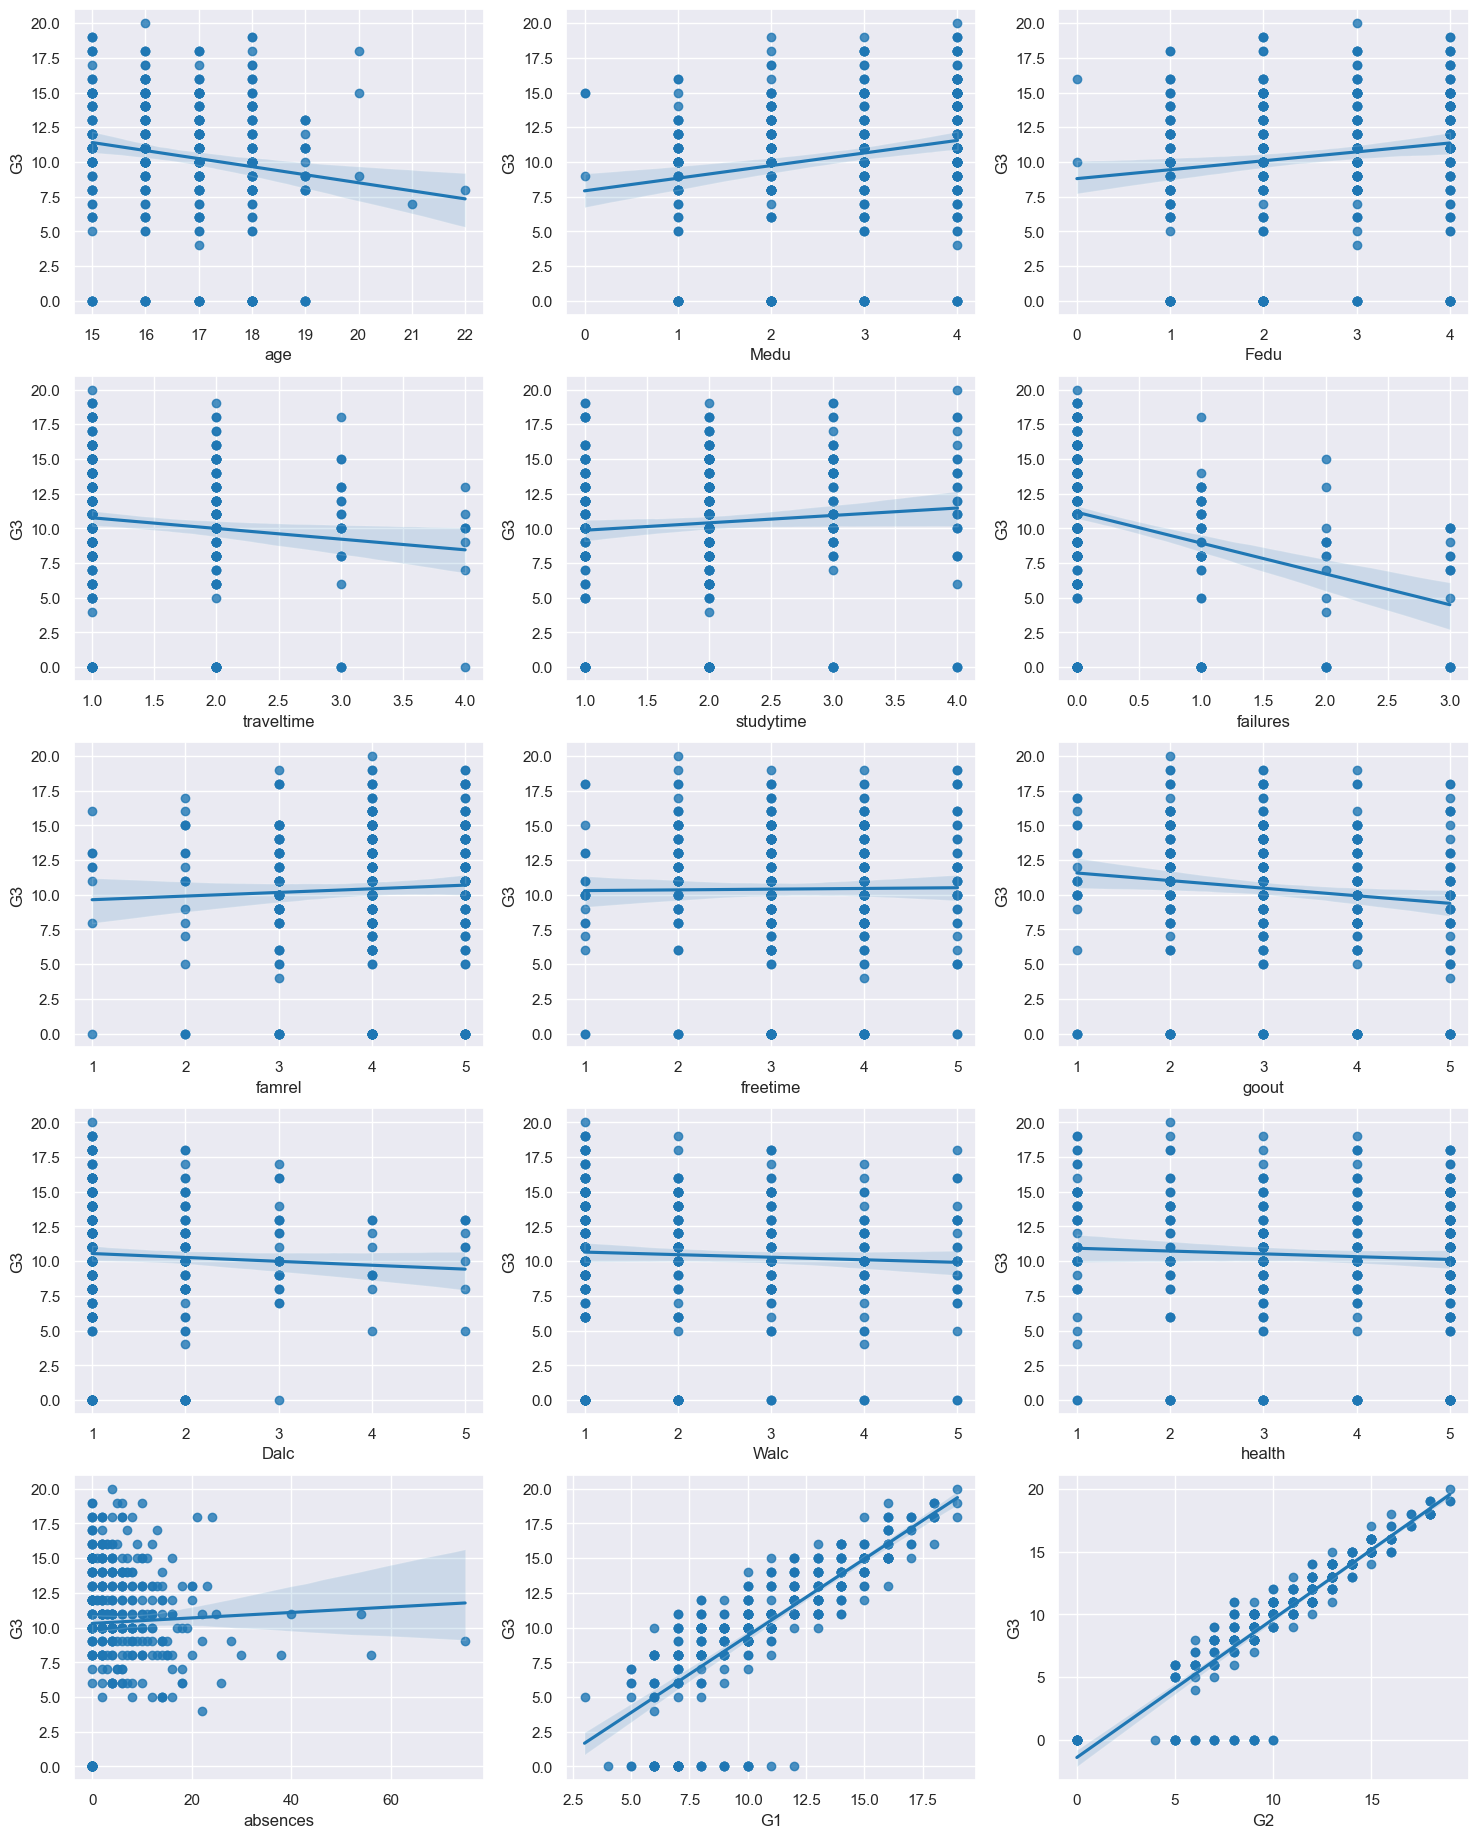

In [14]:
plt.figure(figsize=(18,23))
for i,col in enumerate(numerical_col[:-1], start=1):
    plt.subplot(5, 3, i)
    sns.regplot(x=df[col], y="G3", data=df)
plt.show()

In [15]:
age_grade = df.groupby("age").aggregate({'G1': 'mean', 'G2': 'mean', 'G3': 'mean'})
age_grade.reset_index(inplace=True)
age_grade

,age,G1,G2,G3
0,15,11.231707,11.365854,11.256098
1,16,10.942308,11.182692,11.028846
2,17,10.897959,10.479592,10.275510
3,18,10.719512,10.134146,9.548780
4,19,10.250000,9.250000,8.208333
5,20,13.666667,13.666667,14.000000
6,21,10.000000,8.000000,7.000000
7,22,6.000000,8.000000,8.000000


In [16]:
df['General Health'] = (0.5 * df['Dalc'] + 0.5 * df['Walc'] + 2 * df['health'] + df['famrel']) / 4


[Text(0.5, 1.0, 'General Health vs. Final Grade')]

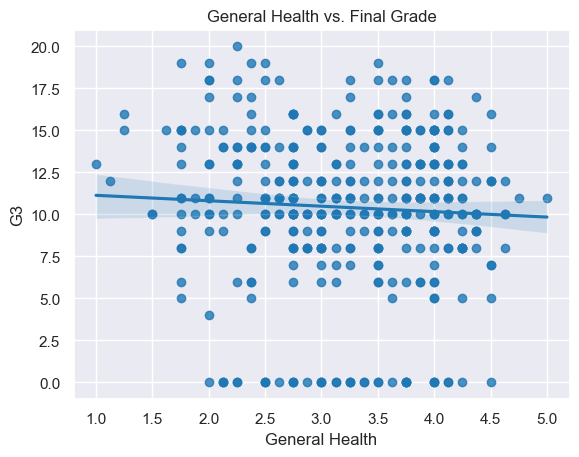

In [17]:
sns.regplot(x='General Health', y='G3', data=df).set(title = 'General Health vs. Final Grade')

<Axes: xlabel='Time Efficiency', ylabel='G3'>

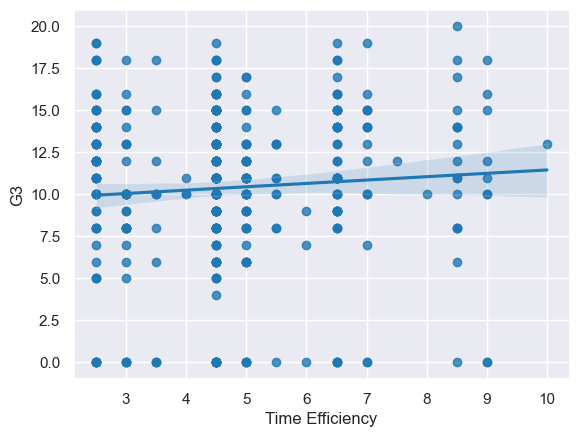

In [18]:
df['Time Efficiency'] = 0.5 * df['traveltime'] + 2 * df['studytime']
sns.regplot(x='Time Efficiency', y='G3', data=df)

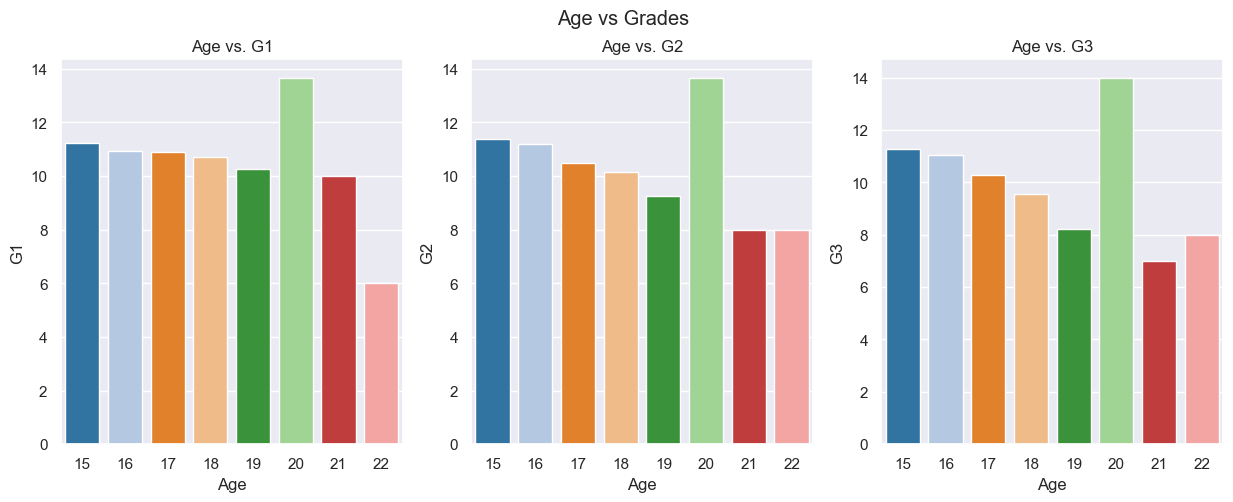

In [19]:
grades=['G1','G2','G3']
fig, axes = plt.subplots(1, 3,figsize=(15,5))
fig.suptitle('Age vs Grades')
for i in range(3):
    sns.barplot(ax=axes[i], data=age_grade, x='age', y=grades[i]).set(xlabel='Age', 
                                                                      ylabel=grades[i], 
                                                                      title=f'Age vs. {grades[i]}');
plt.show();

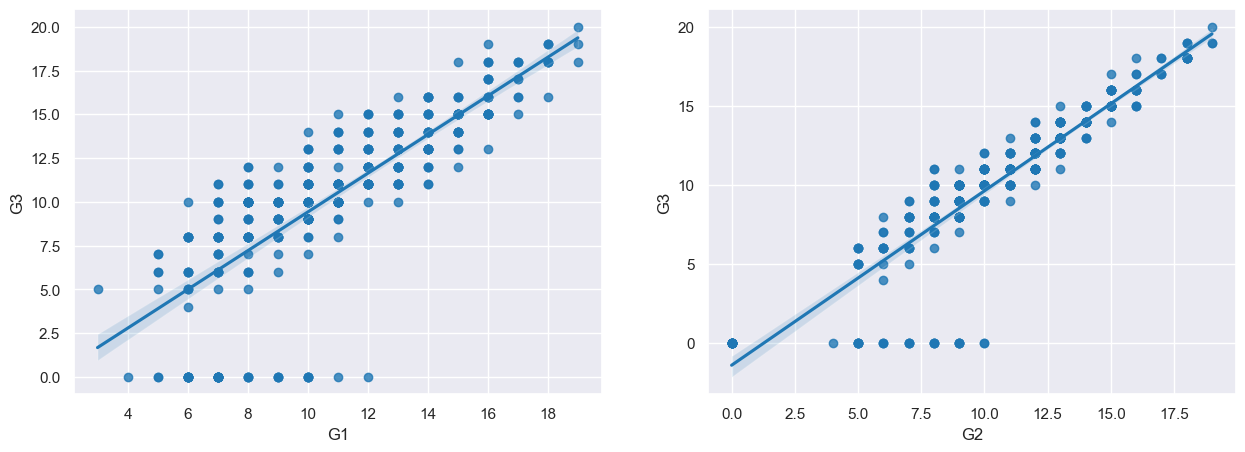

In [20]:
grades=['G1','G2']
fig, axes = plt.subplots(1, 2,figsize=(15,5))
for i in range(2):
    sns.regplot(ax=axes[i],x=grades[i], y="G3", data=df)

plt.show();

[Text(0.5, 1.0, 'Absences vs G3')]

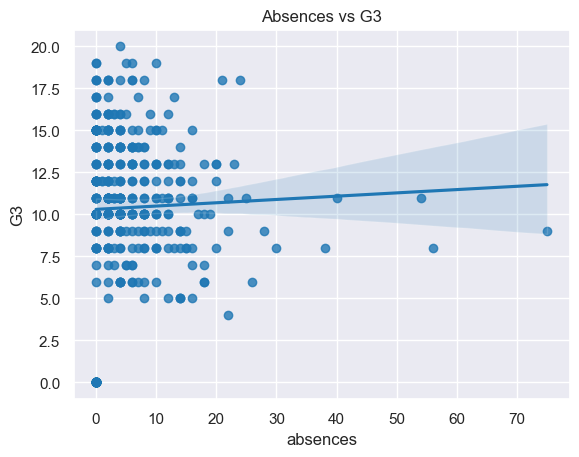

In [21]:
sns.regplot(x='absences', y='G3', data=df).set(title='Absences vs G3')

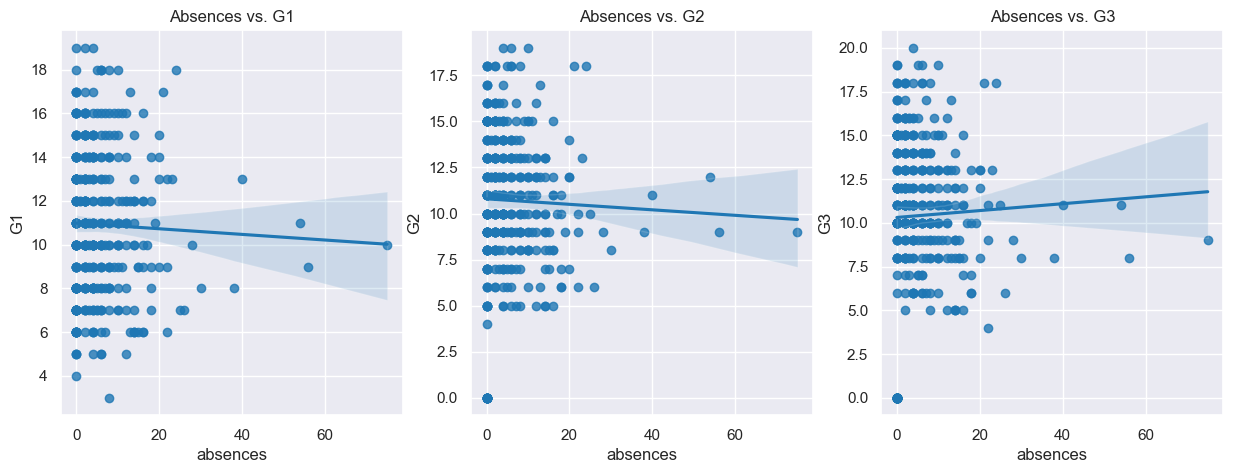

In [22]:
grades=['G1','G2','G3']
fig, axes = plt.subplots(1, 3,figsize=(15,5))
for i in range(3):
    sns.regplot(ax=axes[i],x="absences", y=grades[i], data=df).set(title=f'Absences vs. {grades[i]}');

plt.show();

In [23]:
new_df = pd.get_dummies(df, columns=['school','sex','address','famsize','Pstatus',
                                     'Mjob','Fjob','reason','guardian','schoolsup',
                                     'famsup','paid','activities','nursery','higher',
                                     'internet','romantic'])

<Axes: >

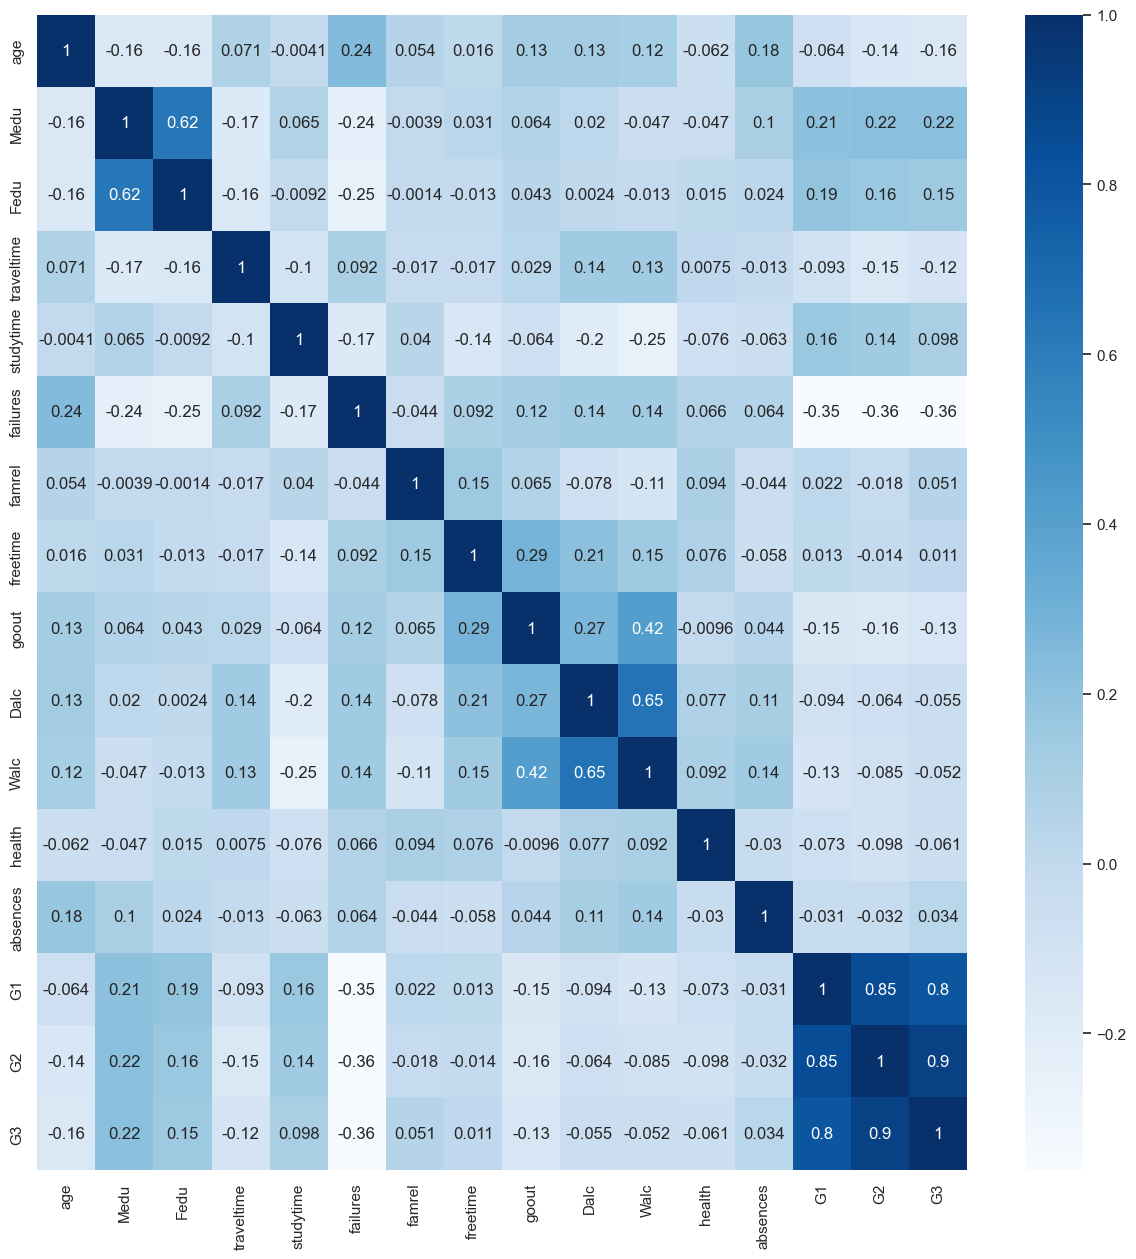

In [24]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(new_df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 
                    'failures', 'famrel', 'freetime', 'goout', 'Dalc', 
                    'Walc', 'health', 'absences', 'G1', 'G2', 'G3']].corr(),annot=True,ax=ax,cmap="Blues")

In [25]:
new_df.shape

(395, 61)

In [26]:
X = new_df.drop(['G3'],axis=1)
y = new_df['G3']

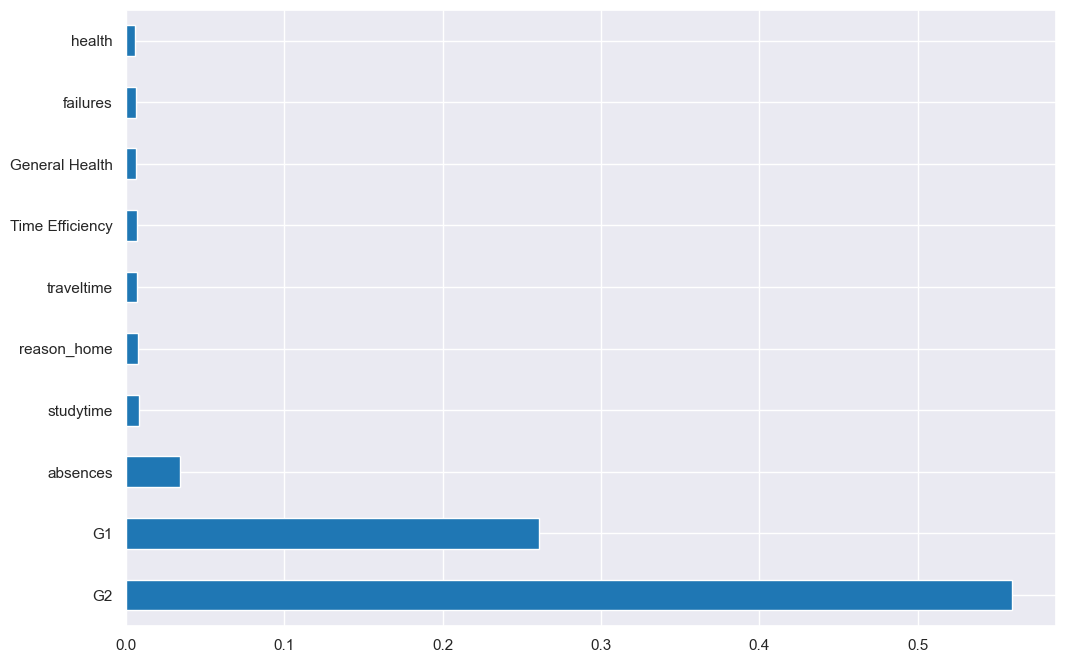

In [27]:
selection = ExtraTreesRegressor()
selection.fit(X, y)
plt.figure(figsize = (12,8))
f_importances = pd.Series(selection.feature_importances_, index=X.columns)
f_importances.nlargest(10).plot(kind='barh')
plt.show()

In [28]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square) 
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [29]:
X = df[['absences','G1', 'G2']]
y = df[['G3']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4528)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((276, 3), (276, 1), (119, 3), (119, 1))

In [31]:
pipeline = Pipeline([('std_scalar', StandardScaler())])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [32]:
#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
results = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results

Test set evaluation:
_____________________________________
MAE: 1.2368171903107876
MSE: 5.25507344074282
RMSE: 2.292394695671498
R2 Square 0.7747762050204923
Train set evaluation:
_____________________________________
MAE: 1.0453649279802353
MSE: 2.9920519400742123
RMSE: 1.7297548786097445
R2 Square 0.848616295493082


,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,1.236817,5.255073,2.292395,0.774776


In [33]:
#Polynomial Regression
poly_reg = PolynomialFeatures(degree=2)
X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_train_2_d,y_train)
test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
results_1 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results = pd.merge(results , results_1, how='outer')
results

Test set evaluation:
_____________________________________
MAE: 1.2793228095822367
MSE: 5.064791691172748
RMSE: 2.250509207084643
R2 Square 0.7829313675004773
Train set evaluation:
_____________________________________
MAE: 1.0412103279708167
MSE: 2.7723775313560317
RMSE: 1.6650458045819736
R2 Square 0.8597307836246951


,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,1.236817,5.255073,2.292395,0.774776
1,Polynomail Regression,1.279323,5.064792,2.250509,0.782931


In [34]:
#Random-Forest regression
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)
test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
results_1= pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred) ]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results = pd.merge(results , results_1 , how='outer')
results

C:\Users\saikr\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test set evaluation:
_____________________________________
MAE: 1.0505505089914757
MSE: 3.391011831023703
RMSE: 1.8414700190401425
R2 Square 0.8546668163603035
Train set evaluation:
_____________________________________
MAE: 0.5199027007412876
MSE: 1.0380172726445631
RMSE: 1.0188313268861353
R2 Square 0.9474812258535846


,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,1.236817,5.255073,2.292395,0.774776
1,Polynomail Regression,1.279323,5.064792,2.250509,0.782931
2,Random Forest Regressor,1.050551,3.391012,1.841470,0.854667


<Axes: ylabel='Model'>

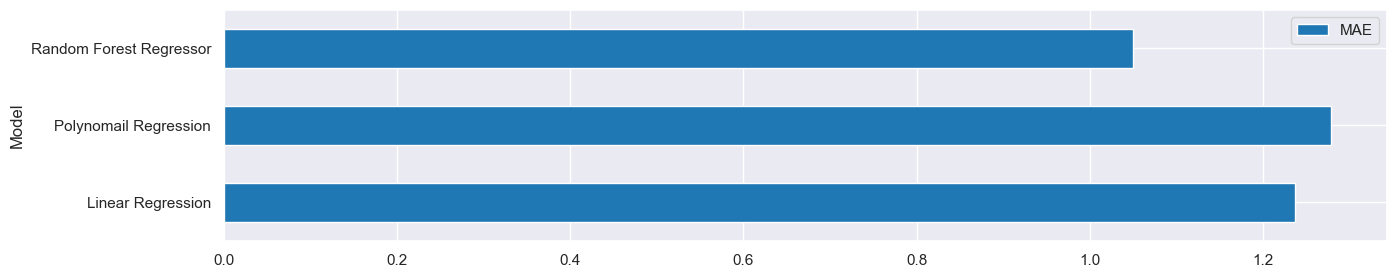

In [35]:
results.plot(x='Model',y='MAE',kind='barh', figsize=(15, 3))

<Axes: ylabel='Model'>

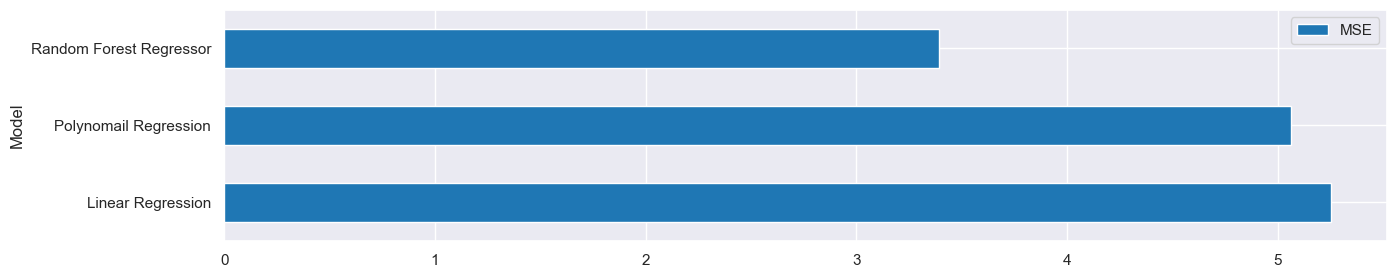

In [36]:
results.plot(x='Model',y='MSE',kind='barh', figsize=(15, 3))

<Axes: ylabel='Model'>

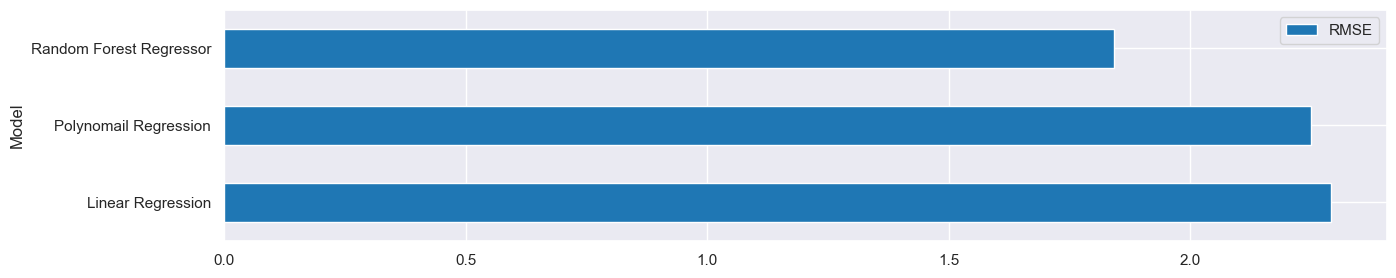

In [37]:
results.plot(x='Model',y='RMSE',kind='barh', figsize=(15, 3))

<Axes: ylabel='Model'>

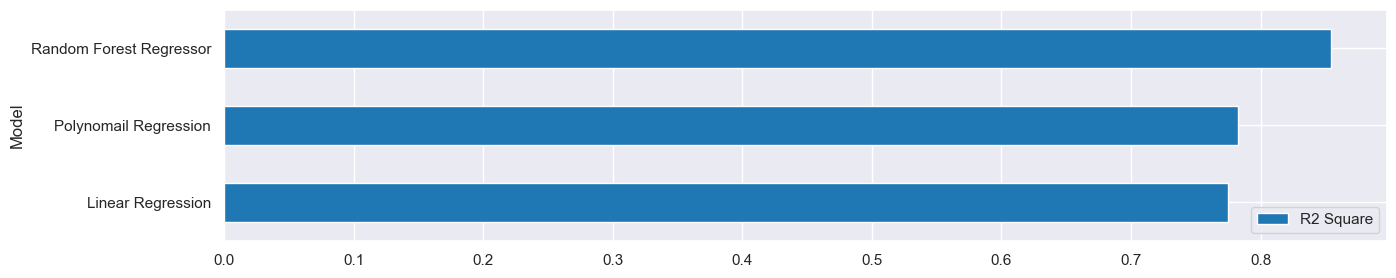

In [38]:
results.plot(x='Model',y='R2 Square',kind='barh', figsize=(15, 3))

<Axes: xlabel='Model'>

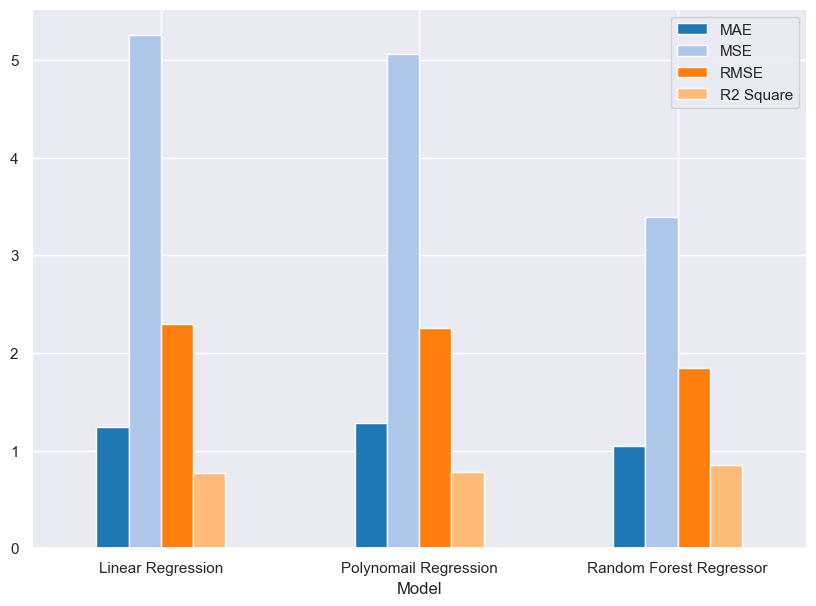

In [39]:
results.plot(x='Model',kind='bar', figsize=(10, 7),rot=0)